In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
from  PyILP.PyILP import *
import warnings
warnings.filterwarnings('ignore')
from pyswip import Prolog, Variable, Functor

In [19]:
df = pd.read_csv("Mutagen_Num.CSV")

In [20]:
df.head()

,Name,ind1,inda,logp,lumo,status
0,d112,1.0,0.0,3.81,-1.208,active
1,d20,1.0,0.0,3.4,-1.764,active
2,d109,1.0,0.0,6.07,-2.284,active
3,d25,1.0,0.0,3.43,-1.398,active
4,d26,0.0,0.0,2.17,-2.072,active


In [21]:
df.columns

Index(['Name', 'ind1', 'inda', 'logp', 'lumo', 'status'], dtype='object')

In [22]:
df1 = df.drop(columns=['Name'])

In [23]:
df1.head()

,ind1,inda,logp,lumo,status
0,1.0,0.0,3.81,-1.208,active
1,1.0,0.0,3.4,-1.764,active
2,1.0,0.0,6.07,-2.284,active
3,1.0,0.0,3.43,-1.398,active
4,0.0,0.0,2.17,-2.072,active


In [24]:
le = LabelEncoder()
df1['status']=le.fit_transform(df1['status'])

In [26]:
df1.head()

,ind1,inda,logp,lumo,status
0,1.0,0.0,3.81,-1.208,0
1,1.0,0.0,3.4,-1.764,0
2,1.0,0.0,6.07,-2.284,0
3,1.0,0.0,3.43,-1.398,0
4,0.0,0.0,2.17,-2.072,0


In [27]:
df1['status'].value_counts()

0    125
1     63
Name: status, dtype: int64

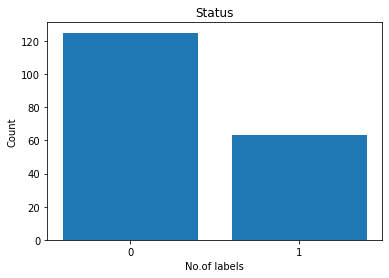

In [28]:
status_counts = df1['status'].value_counts()
plt.bar(['0', '1'], status_counts.values)
plt.xlabel("No.of labels")
plt.ylabel("Count")
plt.title("Status")

plt.show()

In [29]:
X=df1.drop(columns=['status'])
y = df1['status']

In [30]:
Col_List =  list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)
DesT = DecisionTreeClassifier(criterion = 'entropy')
DesT.fit(X_train, y_train)
y_pred =  DesT.predict(X_test)
print('Accuracy on training data: ', accuracy_score(y_true=y_train, y_pred=DesT.predict(X_train)))
print('Accuracy on the testing data: ', accuracy_score(y_true=y_test, y_pred=DesT.predict(X_test)))

Accuracy on training data:  1.0
Accuracy on the testing data:  0.9298245614035088


In [31]:
Rules = export_text(DesT,feature_names=Col_List)
print(Rules)

|--- ind1 <= 0.50
|   |--- lumo <= -2.13
|   |   |--- class: 0
|   |--- lumo >  -2.13
|   |   |--- lumo <= -1.09
|   |   |   |--- logp <= 2.04
|   |   |   |   |--- logp <= 1.76
|   |   |   |   |   |--- lumo <= -1.84
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lumo >  -1.84
|   |   |   |   |   |   |--- logp <= 1.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- logp >  1.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- logp >  1.76
|   |   |   |   |   |--- class: 1
|   |   |   |--- logp >  2.04
|   |   |   |   |--- logp <= 2.59
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- logp >  2.59
|   |   |   |   |   |--- logp <= 3.48
|   |   |   |   |   |   |--- logp <= 2.78
|   |   |   |   |   |   |   |--- lumo <= -1.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- lumo >  -1.43
|   |   |   |   |   |   |   |   |--- logp <= 2.71
|   |   |   |   |   |   |   |   |   |--- lumo <= -1.12
|   |   |   | 

In [32]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [33]:
print("Score:",nb.score(X_train, y_train))

Score: 0.6564885496183206


In [34]:
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7192982456140351



['active(A) :-   atm(A,B,h,3,C), C=0.144.', 'active(A) :-   ind1(A,1.0).', 'active(A) :-   atm(A,B,o,40,C), C= -0.383.', 'active(A) :-   atm(A,B,c,29,C), C=0.01.', 'active(A) :-   atm(A,B,c,16,C), C= -0.191.', 'active(d145).', 'active(A) :-   atm(A,B,c,27,C), C=0.012.', 'active(d172).', 'active(d37).', 'active(d146).']
+----------+ Testing +----------+
+---------------------+------------------+------------------+
|       n = 38        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 21               | 2                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 4                | 11               |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.842 |
+-------------+-------+
| Precision   | 0.913 |
+-------------+-------+
| Sensitivity | 0.840 |
+-------------+--

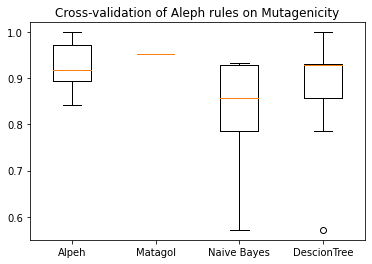

Text(0, 0.5, 'Learning time (Sec)')

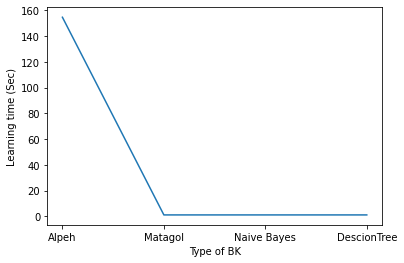

In [11]:
models = []
BK_3 = 'b_3.pl'
BK_4 ="b_33.pl"




models.append(('Aleph',"Aleph", BK_3))
models.append(('Metagol',"Metagol", BK_3))
models.append(('Naive Bayes',"Naive Bayes" ,GaussianNB()))
models.append(('Decision Tree', "DescionTree" ,DecisionTreeClassifier()))

results1 = []
names1 = []
avg_time = []
for name, label, model in models:
    print("\n")
    
    if name=="Aleph":
        model_1=aleph_cross_validation(model,  CV=5,  positive_example="pos_example_m.f", 
                                       negative_example="neg_example_m.n")
        cv_results=model_1.accuracy
    elif name=="Metagol":
        #continue
        model_1=metagol_learn(model, positive_example="pos_example_m.f", 
                                       negative_example="neg_example_m.n")
        cv_results=model_1.accuracy       
    else:
        kfold = StratifiedKFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(model_1.time_learn)
    names1.append(label)
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Mutagenicity')
pyplot.show()

pyplot.plot(names1,avg_time)
pyplot.xlabel("Type of BK")
pyplot.ylabel("Learning time (Sec)")